![studio](Images/filmstudio.jpg)

# Microsoft Movie Studio Project

**Author:** Elsie Ochieng
***

## Overview


The movie industry has grown and evolved over the years and has seen an influx of numerous innovative companies that have made their mark in the entertainment landscape.Microsoft is keen on getting in on the fun and wants business recommendations on how to approach the new venture.To achieve this, data analysis was conducted on datasets from Imdb, The Numbers and Rotten Tomatoes.From the analysis done it was clear that the industry requires proper planning budget wise to make good profit, movie properties and features such as runtime are key factors to considor and who you work with in the industry is important.

The following are recommended:
 - Identify popular genres and optimal movie runtimes
 - Ensure there is meticulous budgeting and preparation
 - Collaborate with the best in the business

# Business Problem

To ensure that Microsoft has the information needed to successfully enter the market exploratory data anlysis was carried out on various datasets to retrieve key business recommendations. First, budgeting and rvenues were looked into because the main goal of entering into any buiness is of course to make profit. Secondly,  movie properties and features such as runtime and popular genres were investigated as these are what separate a hit movie from others. Third was to look into who to work with in the industry as well as who the competition is. This will help Microsoft set itself apart from the rest and find unique ways to ensure they standout from the rest.
***

## Data Understanding

The data used came from three different sources.

**1. The Numbers**

A website that tracks box office revenue using algorithms to also forecast incomes of film projects. The specific dataset used contains information on movies, release dates, production budgets, domestic and worldwide income all of which were target variables.

**2. Rotten Tomatoes**

Contains aggregates of movie reviews from critics and audiences. Implements a Tomatometer system to rate movies thus giving people information on what different critics think of a movie. The data used includes movie reviews, genres, runtimes and studios.


**3. Internet Movie Database(IMDb)**

An online database that contains information about movies, tv shows, actors, directors and other aspects of the entertainment industry. The dataset used contained tables about movies, directors, writers and other personnel related to the movies. Also contained average movie ratings and number of votes received for the ratings.


***

### Loading the various datasets

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#The numbers(tn) dataset
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col = 0)
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#IMDB dataset

movie_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
# movie_basics_df.head()

movie_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
# movie_ratings_df.head()

movie_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
# movie_akas_df.head()

principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
# principals_df.head()

persons_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
# persons_df.head()

In [4]:
#The rotten tomatoes(rt) datasets
rt_movieinfo_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', encoding='utf-8', delimiter='\t')
rt_movieinfo_df.head()

rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', encoding='iso-8859-1', delimiter='\t')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## Data Preparation and Cleaning

Cleaning and Preparing the data for analysis.

***

### The Numbers Dataset

In [5]:
# Preview dataset content
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


A quick overview of he daat shows that there are no null values. Since I am keen on investigating the production budget, domestic and worldwide gross, there is need to convert the values from strings to numbers and confirm that they are all in the same currency.

In [6]:
#Check that production_budget, domestic_gross & worldwide-gross all in dollars
#Use function
# print("Production budget is in dollars" + tn_df['production_budget'].startswith('$'))
def amount_in_dollars(data,columns):
    for col in columns:
        if data[col].str.startswith('$').all():
            print("Amount is in dollars")
        else:
            print("Amount is not in dollars")
            
amount_in_dollars(tn_df, ['production_budget', 'domestic_gross', 'worldwide_gross'])

Amount is in dollars
Amount is in dollars
Amount is in dollars


The amounts in all the columns are in dollars and can therefore be transformed into number datatypes without needing currency conversions. 

In [7]:
#Change datatypes to float and remove characters
def change_data_type (data,columns):
    pd.set_option('display.float_format', '{:.2f}'.format) #To ensure all digits are displayed as required
    
    for col in columns:
        data[col] = data[col].str.replace(r'[\$,]', '').astype(float)  
    return data.dtypes

change_data_type(tn_df,['production_budget', 'domestic_gross', 'worldwide_gross'] )

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [8]:
#Check data to confirm
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00


In [9]:
#Check for duplicates
tn_duplicates = tn_df[tn_df.duplicated()]
tn_duplicates #NO DUPLICATES


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,


Add a new column net_revenues to analyze the returns from each movie produced.

In [10]:
#Create new column for net_income (production_budget - world_wide_gross)
tn_df['revenue'] = tn_df['worldwide_gross'] - tn_df['production_budget']
tn_df['year'] = tn_df['release_date'].str[-4:].astype(int)
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,year
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,2011
3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,2019
4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00,2017


In [11]:
#Check for all columns and non-null values
tn_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
 5   revenue            5782 non-null   float64
 6   year               5782 non-null   int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 338.8+ KB


### Rotten Tomatoes dataset

From this dataset the goal is to obtain data on movie runtimes, their fresh ratings and related studios. First step is to combine the datasets
A look over the values in some of the columns helped identify the columns that need to be dropped. The reviews column has written reviews that will prove difficult to analyse effectively. I also chose to drop the ratings column because the ratings by the different critics vary greatly from numbers to letter grading.

In [12]:
#Join rt_reviews and rt_movieinfo 
rt_combined = rt_movieinfo_df.set_index('id').join(rt_reviews_df, on = 'id', lsuffix='_info', rsuffix='_reviews' )

#Drop unnecessary columns  'currency', 'box_office'
rt_combined.drop(columns=['synopsis', 'dvd_date','review', 'rating_reviews', 'genre','director', 'writer', 'publisher', 'currency' ], inplace=True)
rt_combined.head()

,rating_info,theater_date,box_office,runtime,studio,id,fresh,critic,top_critic,date
id,,,,,,,,,,
1,R,"Oct 9, 1971",NaN,104 minutes,NaN,3,rotten,Annalee Newitz,0,"May 23, 2018"
3,R,"Aug 17, 2012","600,000",108 minutes,Entertainment One,3,fresh,Daniel Kasman,0,"November 16, 2017"
5,R,"Sep 13, 1996",NaN,116 minutes,NaN,3,fresh,Michelle Orange,0,"September 11, 2017"
6,R,"Dec 9, 1994",NaN,128 minutes,NaN,3,rotten,Eric D. Snider,0,"July 17, 2013"
7,NR,NaN,NaN,200 minutes,NaN,3,rotten,Matt Kelemen,0,"April 21, 2013"


To be able to count the movie ratings per movie, a new column was created to contain the ratings as Fresh =1 and Rotten =0 so as to be able to perform various functions on them.

In [13]:
#Create new column to represent movie ratings as boolean values, fresh == True and rotten == False
rt_combined['fresh_rating'] = rt_reviews_df['fresh'].map({'fresh': 1, 'rotten': 0})

In [14]:
#Replace missing values in 'critic' with Anonymous
rt_combined['critic'].fillna('Anonymous', inplace=True)

# #Replace missing values in 'publisher' with most frequent
# frequent_publisher = rt_reviews_df['publisher'].mode()[0]
# rt_reviews_df['publisher'].fillna(frequent_publisher, inplace=True)

In [15]:
#Check columns and null values
rt_combined.isnull().sum() #No null values
#Preview rt_movies_df
# rt_combined.head()

rating_info        3
theater_date     359
box_office      1220
runtime           30
studio          1066
id                 0
fresh              0
critic             0
top_critic         0
date               0
fresh_rating       0
dtype: int64

#### Studio data

In [16]:
# Create a copy of rt_combined and separate data on the studios to analyse competitors
studios = rt_combined[['rating_info', 'box_office', 'studio', 'fresh_rating']].copy()

#rename studio colums to studio_name
studios.rename(columns = {'studio' : 'studio_name'}, inplace=True)

#Convert 'box_office values to dtype float
studios['box_office'] = studios['box_office'].str.replace(',', '').astype(float)

#Drop null values in studio_name and box_office
studios.dropna(subset=['studio_name', 'box_office'], inplace=True)


In [17]:
#Group by studio_name and sum of  ratings
studios.groupby(['studio_name'])['fresh_rating'].sum().nlargest(100)

studio_name
Paramount Pictures                         14
Universal Pictures                         14
20th Century Fox                           13
Sony Pictures Classics                     13
Warner Bros. Pictures                      12
                                           ..
DreamWorks SKG                              0
Echolight Studios                           0
Eros Entertainment                          0
Film District                               0
Fingerprint Releasing / Bleecker Street     0
Name: fresh_rating, Length: 100, dtype: int64

Some of the studios appear to have been entered separately despite all being under one company. These values were consolidated.

In [18]:
#All paramount studios to be under Paramount Global
studios['studio_name'] = studios['studio_name'].replace(['Paramount Pictures', 'Paramount Vantage', 'Paramount classics'], 'Paramount Global')

#Warner Bros all under same studio
studios['studio_name'] = studios['studio_name'].replace(['WARNER BROTHERS PICTURES', 'Warner Bros. Pictures'], 'Warner Bros.')

#Combine lionsgate and Lions Gate Films
studios['studio_name'] = studios['studio_name'].replace(['Lionsgate', 'Lions Gate Releasing', 'Lionsgate Films'], 'Lions Gate Films')

#Fox Search light and Fox Searchlight Pictures
studios['studio_name'] = studios['studio_name'].replace('Fox Searchlight', 'Fox Searchlight Pictures')

#Universal studio and Universal Pictures
studios['studio_name'] = studios['studio_name'].replace('Universal Studios', 'Universal Pictures')

#Sony Pictures Entertainment and Sony Pictures
studios['studio_name'] = studios['studio_name'].replace(['Sony Pictures Classics', 'Sony Pictures Entertainment'], 'Sony Pictures')

#### Movie Runtime Data

In [19]:
# Create a copy of rt_combined and select data to analyse runtimes
movie_runtimes = rt_combined[['rating_info', 'box_office', 'runtime', 'fresh_rating', 'date']].copy()

#Change runtime to int and remove 'minutes'
movie_runtimes['runtime'] = rt_combined['runtime'].str.replace('minutes', '')

#Fill 'runtime' with median runtime
median_runtime = movie_runtimes['runtime'].median()
movie_runtimes['runtime'] = movie_runtimes['runtime'].fillna(median_runtime).astype(int)

### IMDB Dataset
While loading the data we saw that there are several tables in the database. those tables are movie_basics, directors, known_for, movie_akas, movie_ratings, persons, principals and writers. 

#### Genre Data


In [20]:
#Join movie_basics_df and movie_ratings_df
#Join movie_directors and movies_df on movie_id
# movies_df = movies_df.join(movie_directors.set_index('movie_id'), on='movie_id')

ratings_basics_df = movie_basics_df.join(movie_ratings_df.set_index('tconst'), on = 'tconst')
ratings_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [21]:
#Fill missing runtime minutes with median runtime
median_runtime = ratings_basics_df['runtime_minutes'].median() #Calculate the median runtime
ratings_basics_df['runtime_minutes'].fillna(median_runtime, inplace=True)

#Drop the rows with no genre
ratings_basics_df.dropna(subset=['genres'], inplace=True)

In [22]:
#Sort the data by number of votes.
ratings_basics_df.sort_values(by='numvotes', ascending=False, inplace = True)

#Determine criteria for choosing how many movies to work with
movie_number = (ratings_basics_df['numvotes']>=50).sum() #There are 36751 movies with more than 50 votes
movie_number

#Drop all movies with less than 50 votes
ratings_basics_df.drop(ratings_basics_df[ ratings_basics_df['numvotes']<50].index, inplace=True)

#Identify columns with null values
ratings_basics_df.isnull().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes        0
genres                 0
averagerating      67684
numvotes           67684
dtype: int64

To be able to analyse the most popular movies by genres and ratings I chose to select the top 30,000 movies from the dataset of over 70,000 movies. This was done by selecting those with the highest number of votes.

Separate the Genres into separate columns to make analysis easier

In [23]:
#Dummy variables for the genres is created
genres_sep = ratings_basics_df['genres'].str.get_dummies(sep=',')

#Select the columns to be put in the genres dataframe
genredf_cols = ['tconst', 'primary_title', 'start_year', 'averagerating', 'numvotes']
genredf_colsdf = ratings_basics_df[genredf_cols] #concat only works with series and dataframes

#Join the dummies and other columns to create the genres_df
genres_df = pd.concat([genredf_colsdf, genres_sep], axis=1)
genres_df.head(5)

,tconst,primary_title,start_year,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
7066,tt1375666,Inception,2010,8.80,1841066.00,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6900,tt1345836,The Dark Knight Rises,2012,8.40,1387769.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
311,tt0816692,Interstellar,2014,8.60,1299334.00,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
20342,tt1853728,Django Unchained,2012,8.40,1211405.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
356,tt0848228,The Avengers,2012,8.10,1183655.00,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Directors data

In [24]:
#Create movie_akas_df copy and filter to US region
movie_titles = movie_akas_df[movie_akas_df['region'] == 'US'].drop_duplicates(subset=['title']).copy()

#Add movie ratings to df and rename
# movies_df = movie_titles.join(movie_ratings_df.set_index('tconst'), on='tconst')

# Merge the two DataFrames on the different column names and keep all columns
movies_df = movie_titles.merge(movie_ratings_df, left_on='title_id', right_on='tconst', how='left')

# #Select 'tconst', 'title','averagerating' and 'numvotes' columns 
movies_df = movies_df[['tconst', 'title','averagerating', 'numvotes']]

# #Obtain the names of directors from principals_df
movie_directors = principals_df[principals_df['category'] == 'director']

# #Join movie_directors and movies_df on 'tconst'
movies_df = movies_df.join(movie_directors.set_index('tconst'), on='tconst')

# #Join persons_df and movies_df on nconst
movies_df = movies_df.join(persons_df.set_index('nconst'), on='nconst')

# #Create final df with 'movie_id', 'title','averagerating', 'numvotes', 'person_id','primary_name' and 'primary_profession' columns
directors_df = movies_df[['tconst', 'title','averagerating', 'numvotes', 'nconst','primary_name', 'primary_profession' ]].copy()

# #Drop null values
directors_df.dropna(subset=['primary_name', 'averagerating', 'primary_profession'], inplace=True)

directors_df.isnull().sum() #No null values

tconst                0
title                 0
averagerating         0
numvotes              0
nconst                0
primary_name          0
primary_profession    0
dtype: int64

In [25]:
# Rename 'tconst' and 'nconst'
directors_df.rename(columns={'tconst': 'movie_id', 'nconst': 'person_id'}, inplace=True)

In [26]:
# Group by 'primary_name' and calculate mean average rating and number of votes for each director
top_directors = directors_df.groupby(['primary_name'])[['averagerating', 'numvotes']].mean()

# Select the top 30 directors based on average rating
top_directors = top_directors.nlargest(30, columns='averagerating')

# Sort by 'averagerating' in descending order
top_directors = top_directors.sort_values(by='averagerating', ascending=False).reset_index()

top_directors.head()

,primary_name,averagerating,numvotes
0,Chad Carpenter,10.00,5.00
1,Loreto Di Cesare,10.00,8.00
2,Tristan David Luciotti,10.00,6.00
3,Lindsay Thompson,10.00,7.00
4,Hamid Benamra,9.80,6.00


## Data Modeling

### Budgets and Profits

***What are the most profitable movies and how much did the spend?*** 
Answering this question will enable us find out how much Microsoft should expect to spend if they intend to make good profit from their Movie Studio.

In [27]:
# Create a df for movies that made profit
profitable_moviesdf = tn_df.loc[tn_df['revenue'] > 0].copy()
#profitable_moviesdf.shape
profitable_moviesdf['year'].min()
# profitable_moviesdf

1915

From this we identify that there are 3657 movies from the initial dataset that were profitable and they were released from the year 1915 - 2019. While calculating budgets and Profits it is important to take into account the profit margin so as to better understand what movies performed best profit wise.

In [28]:
#Create profit margin column
profitable_moviesdf['profit_margin'] = ((profitable_moviesdf['revenue'] - profitable_moviesdf['production_budget']) / profitable_moviesdf['revenue']) * 100

In [29]:
#a summary of measures of central and measures of dispersion.
profitable_moviesdf.describe()

,production_budget,domestic_gross,worldwide_gross,revenue,year,profit_margin
count,3657.00,3657.00,3657.00,3657.00,3657.00,3657.00
mean,38447721.79,62587298.34,138943577.51,100495855.72,2002.93,-365.17
std,47453605.88,78270587.17,204789444.00,170733189.29,13.81,7616.34
min,1100.00,0.00,71644.00,349.00,1915.00,-376595.13
25%,7000000.00,14439985.00,25480031.00,11134983.00,1999.00,-17.16
50%,20000000.00,38122000.00,67348218.00,37977250.00,2006.00,51.13
75%,50000000.00,79366978.00,164675402.00,112886353.00,2012.00,77.57
max,425000000.00,936662225.00,2776345279.00,2351345279.00,2019.00,99.94


To see what movies cost the most to produce from our dataset, the top 100 by budget were selected.

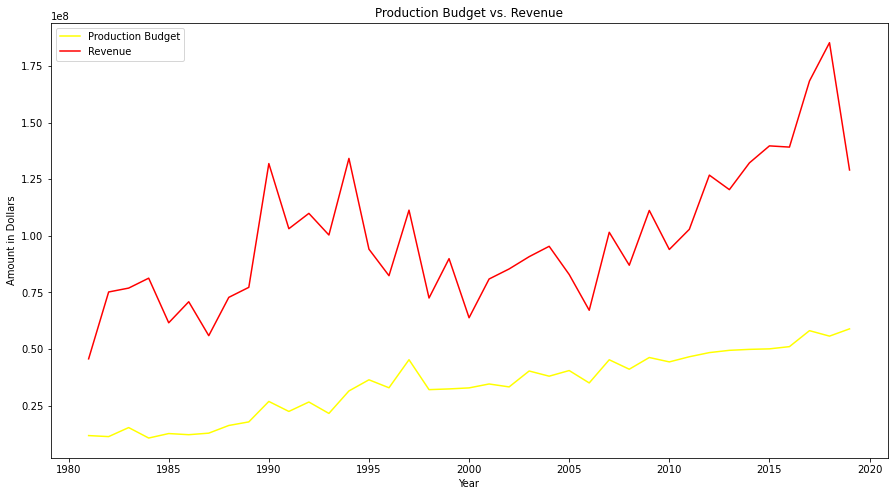

In [30]:
#Linegrapgh comparing the annual growth in budgets and revenue
# Mean revenue and budget for each  year
Growth_df = profitable_moviesdf[profitable_moviesdf['year'] > 1980]
Growth_df = Growth_df.groupby('year').mean().reset_index()

plt.figure(figsize=(15, 8))
# Plot the line graph
plt.plot(Growth_df['year'], Growth_df['production_budget'], label='Production Budget', color = 'yellow')
plt.plot(Growth_df['year'], Growth_df['revenue'], label='Revenue', color = 'red')

plt.xlabel('Year')
plt.ylabel('Amount in Dollars')
plt.title('Production Budget vs. Revenue')
plt.legend();

plt.savefig('Images/Production Budget vs. Revenue.jpg')

plt.show()

correlation between budget and revenue is 0.6503


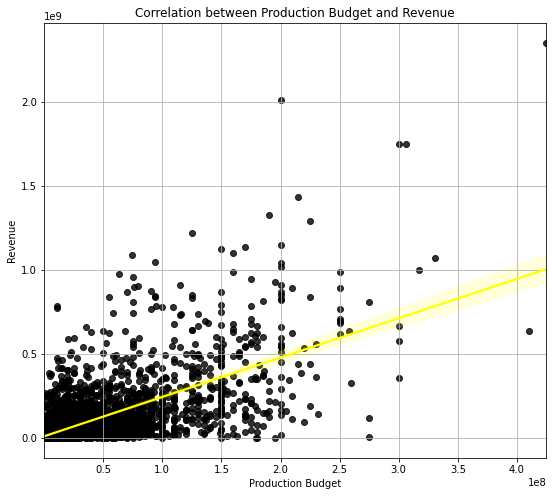

In [31]:
#Calcuate the correlation coefficient between production budget and revenue
correlation = profitable_moviesdf['production_budget'].corr(profitable_moviesdf['revenue'])
correlation = round(correlation, 4)
print(f"correlation between budget and revenue is {correlation}")

#plot scatter plot to visualize the correlation
plt.figure(figsize=(9, 8))
sns.regplot(x='production_budget', y='revenue', data=profitable_moviesdf, scatter_kws={'color': 'black'}, line_kws={'color': 'yellow'})
plt.xlabel('Production Budget')
plt.ylabel('Revenue')
plt.title('Correlation between Production Budget and Revenue')
plt.grid(True)

plt.savefig('Images/Correlation between Production Budget and Revenue.jpg')

plt.show();

The linegraph above shows that the movie business is a lucrative one. At no point has the amount of money used in production been more that the returns gained.
It is also important to note that the amounts have been on a general upward trend other than the revenue dip attributed to covid and should therefore be expected to rise.

The scatter plot shows us that there is a positive correlation between production budget and revenue. This means that there in a tendency for movies with higher production budgets to return higher profits.

Generally, the higher the production budget, the higher the revenue expected. 

Next we analyse the top movies by budget to see how much profit they actually made

In [32]:
#Select top 100 movies by budget
top_100_movies = profitable_moviesdf.nlargest(100, 'production_budget')
top_100_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,year,profit_margin
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,2009,81.93
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,2011,35.35
4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,2015,69.17
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00,2017,68.29
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,1747311220.00,2015,82.49


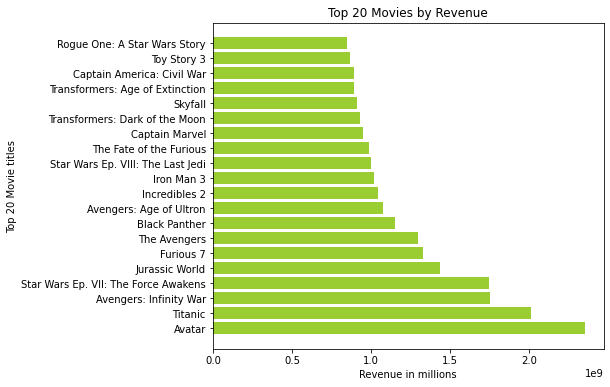

In [33]:
#Top 20 most profitable movies
#Sort the data by revenue
top_100_movies.sort_values(by='revenue', ascending=False, inplace = True)

#Select top15 most profitable movies from the most  to produce
Top_20 = top_100_movies.nlargest(20, 'revenue')

#Select data for bargraph
top_revenue = Top_20['revenue']
top_titles = Top_20['movie'].tolist()

fig,ax = plt.subplots(figsize=(7,6))

#Plot ghraph with pyplot
ax.barh(top_titles, top_revenue, color='yellowgreen')

ax.set_xlabel('Revenue in millions')
ax.set_ylabel('Top 20 Movie titles')
ax.set_title('Top 20 Movies by Revenue')

plt.savefig('Images/Top 20 Movies by Revenue.jpg')

plt.show()

From this we note that the most expensive movie to produce from our dataset was Avatar. Next I compared the producton budgets of these movies to their profits

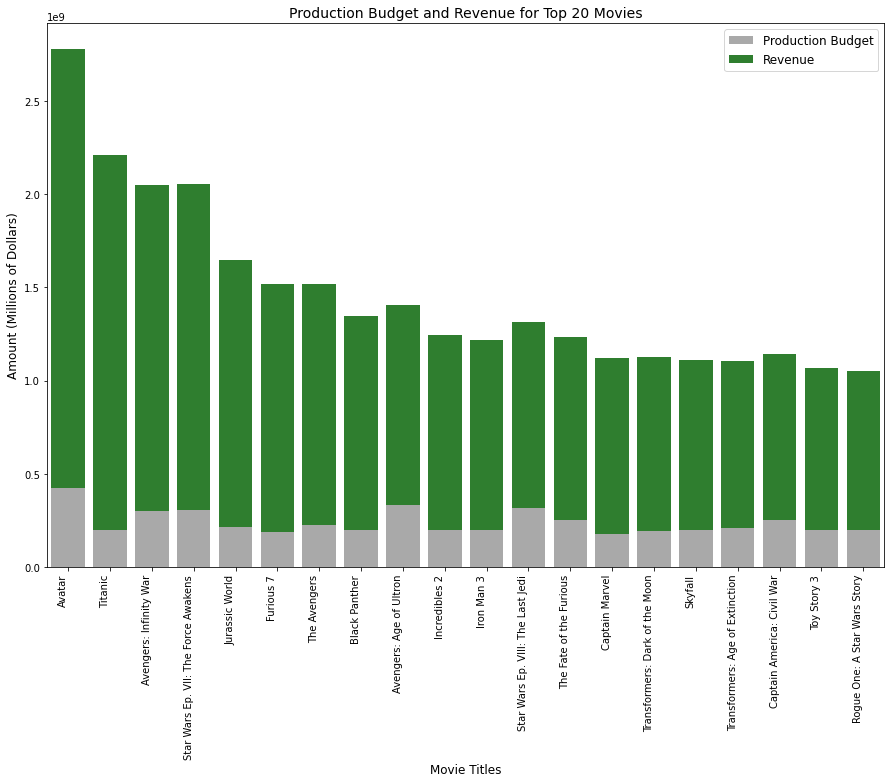

In [34]:
# Plot multiple column bargraph 
plt.figure(figsize=(15, 10))
sns.barplot(x=Top_20['movie'], y=Top_20['production_budget'], color='darkgrey', label='Production Budget', ci=None)
sns.barplot(x=Top_20['movie'], y=Top_20['revenue'], color='forestgreen', label='Revenue', ci=None, bottom=Top_20['production_budget'])

# Customize the plot
plt.xticks(rotation=90, horizontalalignment='right')
plt.xlabel('Movie Titles', fontsize=12)
plt.ylabel('Amount (Millions of Dollars)', fontsize=12)
plt.title('Production Budget and Revenue for Top 20 Movies', fontsize=14)
plt.legend(fontsize=12)

plt.savefig('Images/Production Budget and Revenue for Top 20 Movies.jpg')

plt.show()

In [35]:
#Average profit margin for the most expensive movies
Avg_pm = Top_20['profit_margin'].mean()
Avg_pm = round(Avg_pm, 2)
#Average budget for the most expensive movies
Avg_bdgt = Top_20['production_budget'].mean()
Avg_bdgt = round(Avg_bdgt, 0)

findings = f"Microsoft should expect to spend about {Avg_bdgt} dollars on average so as to get a profit margin of {Avg_pm}."
print(findings)

Microsoft should expect to spend about 239430000.0 dollars on average so as to get a profit margin of 79.34.


From the analysis of budgets and revenue we have noted that:

   1. The higher the budget the more likely profit will be high as well. A comparison of the movies revealed that those with a high production budget returned high profits. microsoft should be ready to invest well into the production of their movies to produce top content.
   
    
   2. Production budgets of movies have been on a steady rise over the years therefore Micrsofts planning should include futureforcasts for expenses and profits
    

### What types of movies?

The second question we want to answer is what kind of movies should the Microsoft Movie Studio be keen on tackling so as to penetrate the market and achieve maximum results.
To do this I tackled 3 areas.
1. Most popular genres
2. Genres with highest ratings
3. Average runtime for movies

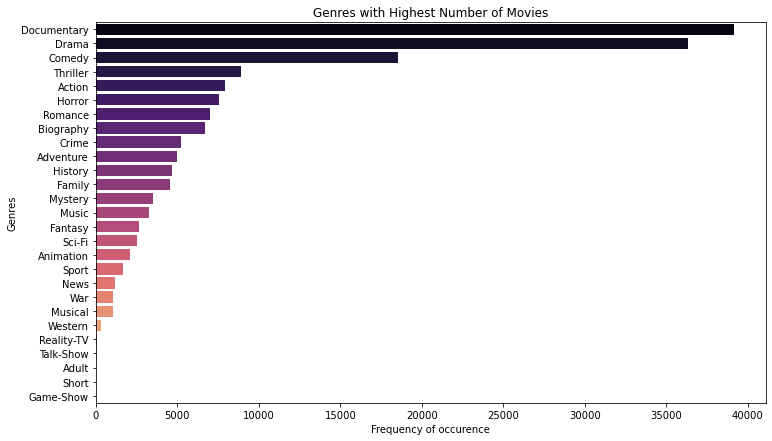

In [36]:
#Evaluate the genres_df to find the genres that are most popular
# all_genres = genres_df.iloc[:, 5:]

#Get names of all genres
# genre_names = all_genres.columns.tolist()

#Obtain the sum of genres
sum_of_genres = genres_df.iloc[:, 5:].sum()
sum_of_genres_sorted = sum_of_genres.sort_values(ascending=False)

genres_data = pd.DataFrame({'Titles': sum_of_genres_sorted.index, 'Values': sum_of_genres_sorted.values})
Values = genres_data['Values']
Titles = genres_data['Titles']

#Set the figure size
fig,ax = plt.subplots(figsize=(12, 7))

#Plot bar grapgh with sns
sns.barplot(x=Values, y=Titles , orient='h', palette='magma')

ax.set_xlabel('Frequency of occurence')
ax.set_ylabel('Genres')
ax.set_title('Genres with Highest Number of Movies')

plt.savefig('Images/Genres with Highest Number of Movies.jpg')

plt.show()

From the plot above it was noted that the most popular genres from the data analysed is Drama. Other genres like Comedy, Documentary, Thriller and action are also popular but not as much.
It is however important to note that most movies tend to have more than one genre therefore it is important that a movie have the right mix of genres for it to be good.

I further analysed the genres by average ratings using the ratings_basics dataframe

In [37]:
#Create a copy of ratings_basics_df
genres_by_ratings = ratings_basics_df.copy()

#Split the genres column into individual genres
genres_by_ratings['genres'] = genres_by_ratings['genres'].str.split(',').tolist()
genres_by_ratings = genres_by_ratings.explode('genres')

#Drop other columns
genres_by_ratings.drop(columns=['original_title','runtime_minutes', 'tconst','start_year', 'numvotes'], inplace=True)

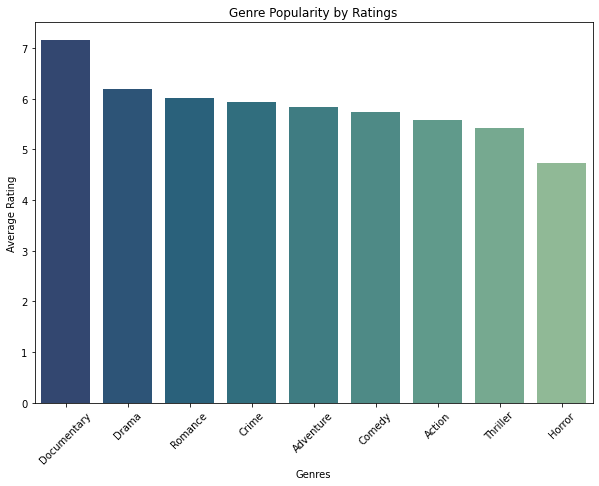

In [38]:
#Group genres by average rating
genre_mean_rating = genres_by_ratings.groupby('genres')['averagerating'].mean().reset_index()
genre_mean_rating = genre_mean_rating.sort_values(by='averagerating', ascending=False)

#Select the genres to be plotted.
common_genres = ['Action','Drama', 'Comedy', 'Documentary', 'Thriller', 'Romance', 'Horror', 'Romance', 'Adventure', 'Crime']

#Filter data
data = genre_mean_rating[genre_mean_rating['genres'].isin(common_genres)]

#Set the figure size
fig,ax = plt.subplots(figsize=(10, 7))

#Plot bar graph with sns
sns.barplot(x='genres', y='averagerating' , data =data, palette='crest_r')

ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')
ax.set_title('Genre Popularity by Ratings')
plt.xticks(rotation=45)         

plt.savefig('Images/Genre Popularity by Ratings.jpg')

plt.show();

From this it was noted that the most popolar genres and those that resulted in highest returns are quite similar. The genre that resulted in highest returns was Action followed cosely by Adventure then Sci-Fi, Thriller and Animation.

When it comes to popularity by ratings Documentary, Drama, Romance were top.

##### How long should the movies be?
To determine the average runtime for movies descriptive statistics was used on the movie runtimes from the Rotten Tomatoes dataset

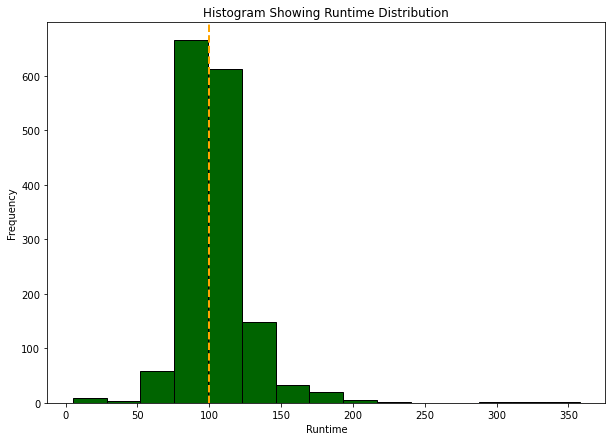

In [39]:
#Calculate the median runtime
median_runtime = movie_runtimes['runtime'].median()

# Plot a histogram for runtime
plt.figure(figsize=(10, 7))
plt.hist(movie_runtimes['runtime'], bins=15, color='darkgreen', edgecolor='black')

plt.axvline(median_runtime, color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Histogram Showing Runtime Distribution')

plt.savefig('Images/Histogram Showing Runtime Distribution.jpg')

plt.show()

In [40]:
movie_runtimes['runtime'].describe()

count   1560.00
mean     103.89
std       24.41
min        5.00
25%       91.00
50%      100.00
75%      114.00
max      358.00
Name: runtime, dtype: float64

Most movies are about 100 minutes long. I would recommend that Microsoft not have movie runtimes of between 90 - 150 minutes. Further analysis would need to be carried out to determine the best runtimes per movie genre

### 3. Competition and collaborators
In any business t is important to know who your competition is and who best to work with.
For this section I used the Imdb Dataset to determine which directors had the best ratings on their movies. Movie directors, producers and writers are part of the key items that ensure that a movie studio and its movies are successful.
The same data set was also used to map out the studios that are performing well in terms of movie quantities and movie ratings

In [41]:
#Obtain list of top 10 directors by average ratings
top_10_directors=top_directors.nlargest(10, columns = 'averagerating')
top_10_directors = top_10_directors['primary_name'].tolist()
print(f"The top 10 directors that Miscrosoft may consider working with are {top_10_directors}")

The top 10 directors that Miscrosoft may consider working with are ['Chad Carpenter', 'Loreto Di Cesare', 'Tristan David Luciotti', 'Lindsay Thompson', 'Hamid Benamra', 'Todd Howe', 'Bill Suchy', 'J.M. Berrios', 'Steve Wystrach', 'Tobias Frindt']


Below is a scatter plot with annotations for the best 5 out of the 10

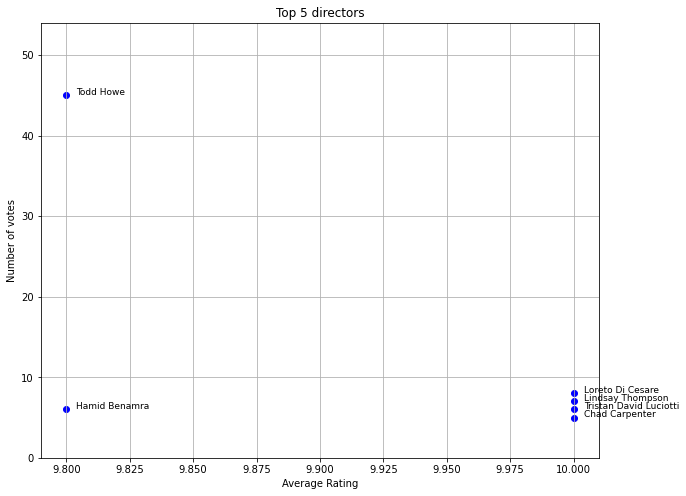

In [42]:
top_5_directors = top_directors.nlargest(6, columns = 'averagerating')
# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the scatter plot
plt.scatter(x=top_5_directors['averagerating'], y=top_5_directors['numvotes'], color='blue')

# Add text labels for each data point
for i, name in enumerate(top_5_directors['primary_name']):
    plt.annotate(name, (top_5_directors['averagerating'][i], top_5_directors['numvotes'][i]), xytext=(10, -1), textcoords='offset points',
                 fontsize=9, ha='left', va='bottom')
# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('Number of votes')
plt.title('Top 5 directors')

# Set the y-axis limits to create more space
plt.ylim(0, top_5_directors['numvotes'].max() * 1.2)  # Adjust the multiplier as needed


# Show the plot
plt.grid(True)

plt.savefig('Images/Top 5 directors.jpg')

plt.show();

Final step was to identify the studios that are doing well in terms of box office performance and ratings

In [43]:
#Filter data by fresh_rating
studios_rating = studios.groupby('studio_name')['fresh_rating'].sum().reset_index()

#Sort values by 'fresh_rating' in descending order and select top 15 studios
studios_rating = studios_rating.nlargest(15, columns = 'fresh_rating').sort_values(by= 'fresh_rating', ascending = False)

#Filter by box_office performance
studios_box = studios.groupby('studio_name')['box_office'].sum().reset_index()

#Sort values by 'box_office' in descending order and select top 15 studios
studios_box = studios_box.nlargest(15, columns='box_office').sort_values(by= 'box_office', ascending = False)
studios_box


,studio_name,box_office
95,Universal Pictures,2144510458.00
64,Paramount Global,1151360104.00
102,Warner Bros.,1137398282.00
76,Sony Pictures,1102785872.00
0,20th Century Fox,1094656144.00
15,Columbia Pictures,534351307.00
101,Walt Disney Pictures,527069599.00
52,MGM,413329948.00
58,Newmarket Film Group,402187787.00
42,IMAX,257704099.00


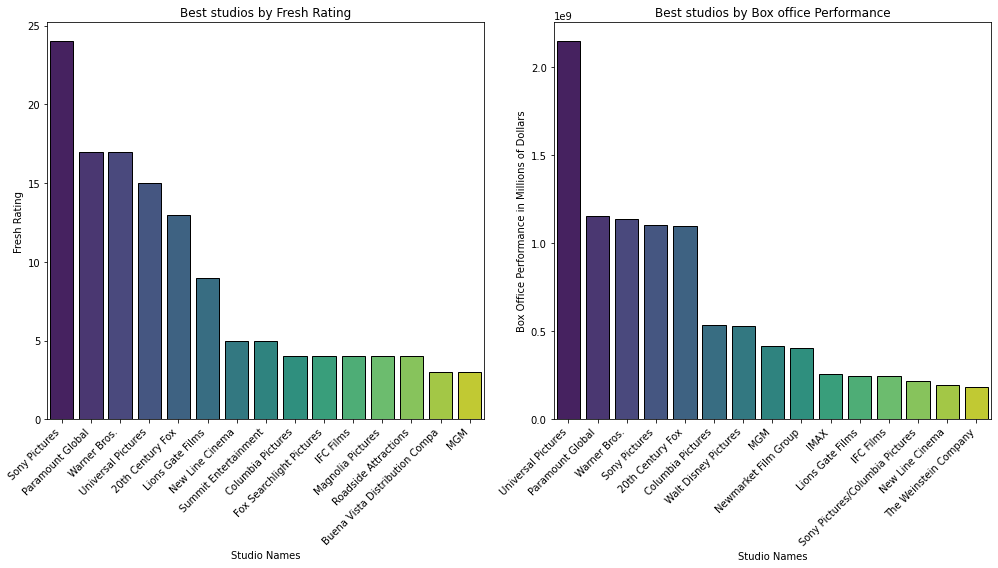

In [44]:
# Create bar plot for top 10 studios by both rating and box office performance
#Set the figure size
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

#Plot studios_rating 
sns.barplot(x='studio_name', y='fresh_rating' , data =studios_rating, ax=ax1, palette='viridis', edgecolor = 'black')
ax1.set_title('Best studios by Fresh Rating')
ax1.set_xlabel('Studio Names')
ax1.set_ylabel('Fresh Rating')

                  
#Plot studios_box 
sns.barplot(x='studio_name', y='box_office' , data =studios_box, ax=ax2, palette='viridis', edgecolor = 'black')
ax2.set_title('Best studios by Box office Performance')
ax2.set_xlabel('Studio Names')
ax2.set_ylabel('Box Office Performance in Millions of Dollars')

#Rotate x-axis
ax1.set_xticklabels(studios_rating['studio_name'], rotation=45, ha='right')  # Adjust x-axis labels rotation and alignment
ax2.set_xticklabels(studios_box['studio_name'], rotation=45, ha='right')  # Adjust x-axis labels rotation and alignment


plt.tight_layout()


plt.savefig('Images/Studio Ratings.png')


plt.show();

From this analysis we can see that there are several directors Microsoft can collaborate wth to ensure that they produce some of the best content that will enable them compete with other movie studios.
We have also noted that to compete with some of the top studios Microsoft needs to aim for an average RT rating of 10. We have also identified some of the studios to look out for.

## Conclusions

This analysis leads to three recommendations for Microsoft' entry in the film industry:

 ***1. Allocate substantial funds for high quality productions***
 
To maximize profitability, Microsoft should consider making significant investments in ts film projects. A larger budget allows 
for the creation of superior films that can attract a wider audience and generate higher returns

     
 ***2. Produce movies within Drama, Action, Comedy, Thriller and Documentary genres***
  
This is because from the nalysis we saw that these genres are the most popular. Microsoft also needs to ensure that the movies they produce have a runtime in the 90 - 100 minute range as this is what viewers prefer.
     
 ***3. Work with the best in the industry and observe competition***
 
There are several directors Microsoft can collaborate wth to ensure that they produce some of the best content that will enable them compete with other movie studios. We have also noted that to compete with some of the top studios Microsoft needs to aim for an average RT rating of 10. We have also identified some of the studios to look out for
   
There is need for further analysis to provide even more insight on the Movie industry. Areas such as offering streaming services is an example of a key area that needs looking into to ensure that Microsoft gets into the industry armed with the best info.

***